# Classification of Alzheimer's Disease progression based on brain MRI and Machine Learning

<hr style="border:2px solid black"> </hr>

## TABLE OF CONTENT
__1. Data structure__
    1. ADNI (Alzheimer’s Disease Neuroimaging Initiative)
    2. IXI (Information eXtraction from Images)
    
__2. Data Processing and Data Visualization__

    2.1 Total data (ADNI + IXI)
    2.2 Cleaning data
    2.3 Divide male and female
    2.4 Stratified sampling
        1. All male data
        2. Male (CN vs. MCI)
        3. Male (CN vs. AD)
        4. Male (MCI vs. AD)
        5. All female data
        6. Female (CN vs. MCI)
        7. Female (CN vs. AD)
        8. Female (MCI vs. AD)
        
__3. Correlation__
    1. Pearson correlation coefficient

__4. Training model - Binary Classifiers__
    
    4.1 Binary Classifier (Male: CN vs. MCI)
        1. SVM (Linear)
        2. Logistic Regression
        3. Decision Tree
        4. Random Forest
        
    4.2 Binary Classifier (Male: CN vs. AD)
        1. SVM (Linear)
        2. Logistic Regression
        3. Decision Tree
        4. Random Forest
    
    4.3 Binary Classifier (Male: MCI vs. AD)
        1. SVM (Linear)
        2. Logistic Regression
        3. Decision Tree
        4. Random Forest
    
    4.4 Binary Classifier (Female: CN vs. MCI)
        1. SVM (Linear)
        2. Logistic Regression
        3. Decision Tree
        4. Random Forest
        
    4.5 Binary Classifier (Female: CN vs. AD)
        1. SVM (Linear)
        2. Logistic Regression
        3. Decision Tree
        4. Random Forest
    
    4.6 Binary Classifier (Female: MCI vs. AD)
        1. SVM (Linear)
        2. Logistic Regression
        3. Decision Tree
        4. Random Forest
        
__5. Training model - Multi-class classifiers__

    5.1 Multi-class classifiers (All male data)
        1. SVM (Linear)
        2. Logistic Regression
        3. Decision Tree
        4. Random Forest
        
    5.2 Multi-class classifiers (All female data)
        1. SVM (Linear)
        2. Logistic Regression
        3. Decision Tree
        4. Random Forest

<!-- <hr style="border:2px solid black"> </hr>
<img src="img/flow_chart.jpg">
<hr style="border:2px solid black"> </hr>
<img src="img/Acc - Male (CN-MCI).jpg">
<hr style="border:2px solid black"> </hr>
<img src="img/Acc - Multi_classifier (Male).jpg">
<hr style="border:2px solid black"> </hr> -->

<hr style="border:2px solid black"> </hr>

## 1. Data structure

Load the ADNI and IXI data sets, explore the structure and distribution of the data, and visualize the data.

In [1]:
# Core
import numpy as np
import pandas as pd
import time
%matplotlib inline
import matplotlib.pyplot as plt
import dill

# skcikit-learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

<hr style="border:px solid black"> </hr>

###  1.1 ADNI    

In [8]:
adni = pd.read_csv("Datasets/adni_dataset.csv")
adni.head()

,SID,lh.bankssts.thickness,lh.caudalanteriorcingulate.thickness,lh.caudalmiddlefrontal.thickness,lh.cuneus.thickness,lh.entorhinal.thickness,lh.fusiform.thickness,lh.inferiorparietal.thickness,lh.inferiortemporal.thickness,lh.isthmuscingulate.thickness,...,right.CA1,right.CA2.3,right.fimbria,right.subiculum,right.CA4.DG,right.hippocampal.fissure,AGE,GENDER,CLASS,SOURCE
0,002_S_0413,2.461,2.494,2.419,1.823,3.234,2.703,2.347,2.602,2.131,...,2245.06,6935.33,468.994,4874.58,4206.16,428.731,76.3,Female,1.0,ADNI
1,002_S_0559,2.364,2.289,2.180,1.610,3.354,2.626,2.282,2.757,2.451,...,3295.72,8485.99,312.787,5582.87,4757.17,465.081,79.3,Male,1.0,ADNI
2,002_S_0816,2.226,3.065,2.098,1.886,3.282,2.778,2.426,2.761,2.293,...,2577.06,7883.22,444.833,4079.73,4282.82,603.752,70.8,Male,3.0,ADNI
3,002_S_1018,2.400,2.553,2.341,1.969,3.023,2.631,2.187,2.754,2.536,...,2195.76,8405.02,578.550,3925.27,4562.00,424.563,70.7,Female,3.0,ADNI
4,002_S_1070,1.974,2.159,2.020,1.809,3.480,2.258,1.852,2.318,1.731,...,3237.34,10248.40,536.539,5627.43,5365.26,366.071,73.6,Male,2.0,ADNI


In [9]:
adni.shape  # 506 rows × 363 columns

(506, 363)

In [10]:
adni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Columns: 363 entries, SID to SOURCE
dtypes: float64(212), int64(148), object(3)
memory usage: 1.4+ MB


In [11]:
# show all rows
pd.options.display.max_rows = None

# Check whether the data has null values
pd.isnull(adni).sum()

SID                                         0
lh.bankssts.thickness                       0
lh.caudalanteriorcingulate.thickness        0
lh.caudalmiddlefrontal.thickness            0
lh.cuneus.thickness                         0
lh.entorhinal.thickness                     0
lh.fusiform.thickness                       0
lh.inferiorparietal.thickness               0
lh.inferiortemporal.thickness               0
lh.isthmuscingulate.thickness               0
lh.lateraloccipital.thickness               0
lh.lateralorbitofrontal.thickness           0
lh.lingual.thickness                        0
lh.medialorbitofrontal.thickness            0
lh.middletemporal.thickness                 0
lh.parahippocampal.thickness                0
lh.paracentral.thickness                    0
lh.parsopercularis.thickness                0
lh.parsorbitalis.thickness                  0
lh.parstriangularis.thickness               0
lh.pericalcarine.thickness                  0
lh.postcentral.thickness          

In [12]:
adni.describe()

,lh.bankssts.thickness,lh.caudalanteriorcingulate.thickness,lh.caudalmiddlefrontal.thickness,lh.cuneus.thickness,lh.entorhinal.thickness,lh.fusiform.thickness,lh.inferiorparietal.thickness,lh.inferiortemporal.thickness,lh.isthmuscingulate.thickness,lh.lateraloccipital.thickness,...,Right.Hippocampus.HS,right.presubiculum,right.CA1,right.CA2.3,right.fimbria,right.subiculum,right.CA4.DG,right.hippocampal.fissure,AGE,CLASS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2.278180,2.615976,2.339974,1.745285,3.057409,2.502172,2.206680,2.571439,2.244115,2.029634,...,2499.901917,3044.858300,2468.258340,7392.427055,379.316328,4340.754368,4053.479545,428.701002,73.076087,2.000000
std,0.208761,0.315199,0.165429,0.152396,0.507267,0.205079,0.179789,0.203762,0.225387,0.160718,...,515.381276,631.658388,428.584958,1336.105011,179.752494,840.333466,738.157784,193.069589,7.357373,0.757798
min,1.532000,1.770000,1.803000,1.317000,0.000000,1.769000,1.510000,1.938000,1.598000,1.498000,...,1181.930000,1213.090000,1351.650000,4219.450000,1.054900,1876.040000,1831.430000,47.941100,55.000000,1.000000
25%,2.165250,2.390500,2.225000,1.646250,2.748500,2.374750,2.101500,2.446250,2.102000,1.929250,...,2127.250000,2596.640000,2145.710000,6478.162500,249.576000,3780.500000,3550.922500,301.930250,68.125000,1.000000
50%,2.291500,2.591500,2.355500,1.743500,3.140500,2.509500,2.238500,2.572000,2.252000,2.031000,...,2481.770000,3072.875000,2486.510000,7466.285000,395.551000,4395.945000,4092.870000,398.969000,73.400000,2.000000
75%,2.422500,2.839250,2.458750,1.846750,3.435500,2.638500,2.327000,2.699750,2.385000,2.141750,...,2854.702500,3498.420000,2749.140000,8340.785000,505.986000,4948.705000,4576.645000,528.284750,78.075000,3.000000
max,2.846000,3.575000,2.755000,2.431000,4.185000,3.021000,2.689000,3.227000,2.984000,2.470000,...,4089.800000,4688.380000,4125.090000,10846.900000,836.279000,6691.600000,5853.930000,1561.330000,90.900000,3.000000


In [13]:
adni["GENDER"].value_counts()

Male      261
Female    245
Name: GENDER, dtype: int64

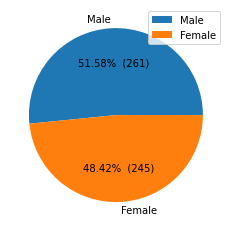

In [14]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

# gender
p1 = adni["GENDER"].value_counts()
plt.pie(p1.values, labels=p1.index, autopct=make_autopct(p1.values))
plt.legend()
plt.show()

In [15]:
adni["CLASS"].value_counts()  
# 1: CN (Cognitively normal)
# 2: MCI (Mild cognitive impairment)
# 3: AD (Alzheimer's disease)

2.0    216
3.0    145
1.0    145
Name: CLASS, dtype: int64

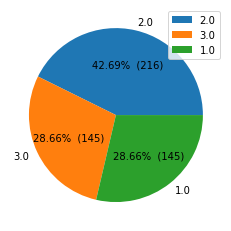

In [16]:
# class
p2 = adni["CLASS"].value_counts()  
plt.pie(p2.values, labels=p2.index, autopct=make_autopct(p2.values))
plt.legend()
plt.show()

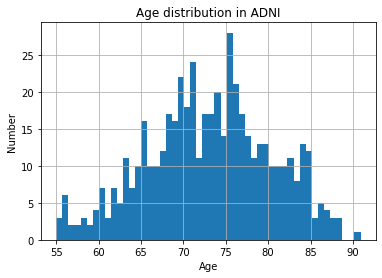

In [17]:
# Age-Number

adni["AGE"].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Number')
plt.title('Age distribution in ADNI')
plt.show()

<hr style="border:px solid black"> </hr>

### 1.2 IXI

In [18]:
ixi_allAge = pd.read_csv("Datasets/ixi_dataset.csv")
ixi_allAge.head()

,SID,lh.bankssts.thickness,lh.caudalanteriorcingulate.thickness,lh.caudalmiddlefrontal.thickness,lh.cuneus.thickness,lh.entorhinal.thickness,lh.fusiform.thickness,lh.inferiorparietal.thickness,lh.inferiortemporal.thickness,lh.isthmuscingulate.thickness,...,right.CA1,right.CA2.3,right.fimbria,right.subiculum,right.CA4.DG,right.hippocampal.fissure,CLASS,GENDER,AGE,SOURCE
0,IXI002-Guys-0828-T1,2.318,2.717,2.678,1.839,3.215,2.809,2.358,2.987,2.753,...,2799.90,8042.91,534.923,5349.10,4592.30,168.556,1,Female,35.80,IXI
1,IXI012-HH-1211-T1,2.710,2.323,2.243,1.877,3.389,2.574,2.416,2.872,2.202,...,3250.82,11576.40,603.219,6630.53,6634.13,541.361,1,Male,38.78,IXI
2,IXI013-HH-1212-T1,2.535,2.356,2.355,1.527,3.232,2.450,2.239,2.753,2.225,...,2860.80,8157.23,463.740,5449.37,4540.28,292.579,1,Male,46.71,IXI
3,IXI014-HH-1236-T1,2.549,2.656,2.345,1.497,3.635,2.593,2.411,2.735,2.736,...,2716.21,9120.04,596.912,5222.08,4812.93,356.949,1,Female,34.24,IXI
4,IXI015-HH-1258-T1,2.597,2.290,2.414,1.589,3.384,2.552,2.217,2.691,2.120,...,2502.78,7642.07,754.573,5000.84,4366.84,564.401,1,Male,24.28,IXI


In [19]:
ixi_allAge.describe()

,lh.bankssts.thickness,lh.caudalanteriorcingulate.thickness,lh.caudalmiddlefrontal.thickness,lh.cuneus.thickness,lh.entorhinal.thickness,lh.fusiform.thickness,lh.inferiorparietal.thickness,lh.inferiortemporal.thickness,lh.isthmuscingulate.thickness,lh.lateraloccipital.thickness,...,Right.Hippocampus.HS,right.presubiculum,right.CA1,right.CA2.3,right.fimbria,right.subiculum,right.CA4.DG,right.hippocampal.fissure,CLASS,AGE
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,...,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.0,562.000000
mean,2.437438,2.648235,2.483402,1.696354,3.390354,2.666057,2.386653,2.791714,2.431448,2.088233,...,2953.828719,3441.075836,2725.610836,8093.094306,483.202453,5072.952954,4519.523203,347.335945,1.0,48.644039
std,0.211802,0.250123,0.172791,0.162286,0.335125,0.197233,0.158257,0.172075,0.244029,0.155944,...,479.102573,481.198987,364.361441,1100.926111,176.291553,622.333034,598.298772,154.653099,0.0,16.486659
min,1.368000,1.822000,1.599000,1.155000,2.068000,1.712000,1.640000,2.086000,1.500000,1.412000,...,1429.740000,1549.260000,1743.400000,5331.660000,10.305900,2497.880000,2845.220000,78.509300,1.0,19.980000
25%,2.314000,2.487250,2.378250,1.587500,3.184250,2.549250,2.299250,2.680500,2.274000,1.989250,...,2639.315000,3115.327500,2472.022500,7335.877500,360.692000,4639.415000,4108.495000,231.871000,1.0,33.707500
50%,2.451000,2.661500,2.487000,1.682000,3.400500,2.663000,2.396000,2.784500,2.416000,2.088000,...,2937.170000,3428.970000,2715.815000,8006.390000,468.902000,5055.245000,4478.570000,317.940000,1.0,48.615000
75%,2.573000,2.809000,2.592500,1.799000,3.600750,2.780750,2.496750,2.899000,2.587750,2.184750,...,3253.430000,3774.132500,2947.137500,8782.972500,589.064500,5475.402500,4892.355000,430.347500,1.0,62.210000
max,3.057000,3.343000,2.911000,2.377000,4.410000,3.406000,2.765000,3.409000,3.189000,2.538000,...,4433.410000,5166.000000,3944.760000,11746.100000,1194.390000,7474.910000,6634.130000,1077.390000,1.0,86.320000


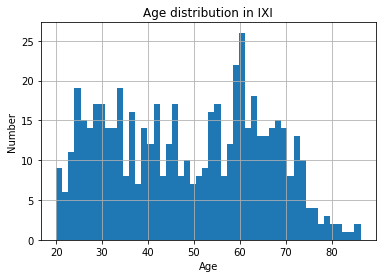

In [20]:
ixi_allAge["AGE"].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Number')
plt.title('Age distribution in IXI')
plt.show()

In [21]:
ixi_allAge.shape   # 562 rows × 363 columns

(562, 363)

In [22]:
# Check whether the data has null values
pd.isnull(ixi_allAge).sum()

SID                                         0
lh.bankssts.thickness                       0
lh.caudalanteriorcingulate.thickness        0
lh.caudalmiddlefrontal.thickness            0
lh.cuneus.thickness                         0
lh.entorhinal.thickness                     0
lh.fusiform.thickness                       0
lh.inferiorparietal.thickness               0
lh.inferiortemporal.thickness               0
lh.isthmuscingulate.thickness               0
lh.lateraloccipital.thickness               0
lh.lateralorbitofrontal.thickness           0
lh.lingual.thickness                        0
lh.medialorbitofrontal.thickness            0
lh.middletemporal.thickness                 0
lh.parahippocampal.thickness                0
lh.paracentral.thickness                    0
lh.parsopercularis.thickness                0
lh.parsorbitalis.thickness                  0
lh.parstriangularis.thickness               0
lh.pericalcarine.thickness                  0
lh.postcentral.thickness          

In [23]:
# Select age equal or older than 55

ixi = ixi_allAge.loc[ixi_allAge["AGE"]>=55]   # 233 rows × 363 columns
ixi.head()

,SID,lh.bankssts.thickness,lh.caudalanteriorcingulate.thickness,lh.caudalmiddlefrontal.thickness,lh.cuneus.thickness,lh.entorhinal.thickness,lh.fusiform.thickness,lh.inferiorparietal.thickness,lh.inferiortemporal.thickness,lh.isthmuscingulate.thickness,...,right.CA1,right.CA2.3,right.fimbria,right.subiculum,right.CA4.DG,right.hippocampal.fissure,CLASS,GENDER,AGE,SOURCE
5,IXI016-Guys-0697-T1,2.356,2.602,2.484,1.463,3.641,2.614,2.130,2.836,2.309,...,2521.63,8273.76,440.471,4593.47,4644.26,358.931,1,Male,55.17,IXI
7,IXI019-Guys-0702-T1,2.234,3.009,2.395,1.675,3.466,2.834,2.301,2.931,2.113,...,3182.12,9614.42,422.846,6469.95,5382.70,442.497,1,Male,58.66,IXI
16,IXI028-Guys-1038-T1,2.340,2.527,2.361,1.647,3.686,2.482,2.203,2.596,2.322,...,2568.46,6774.48,347.245,4796.83,3928.35,475.101,1,Male,74.03,IXI
17,IXI029-Guys-0829-T1,2.228,2.964,2.524,1.903,3.741,2.544,2.390,2.665,2.644,...,2755.20,7249.79,389.814,4805.00,4223.05,465.856,1,Female,59.22,IXI
36,IXI050-Guys-0711-T1,2.287,2.917,2.749,1.966,3.414,2.902,2.354,3.007,2.461,...,3050.64,9624.91,506.245,5603.94,5302.55,568.239,1,Male,63.19,IXI


In [24]:
ixi.shape

(233, 363)

In [25]:
ixi["GENDER"].value_counts()

Female    143
Male       90
Name: GENDER, dtype: int64

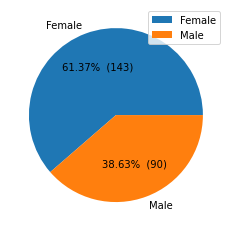

In [26]:
p3 = ixi["GENDER"].value_counts()
plt.pie(p3.values, labels=p3.index, autopct=make_autopct(p3.values))
plt.legend()
plt.show()

In [27]:
ixi["CLASS"].value_counts()  
# 1: CN (Cognitively normal)
# Only class 1

1    233
Name: CLASS, dtype: int64

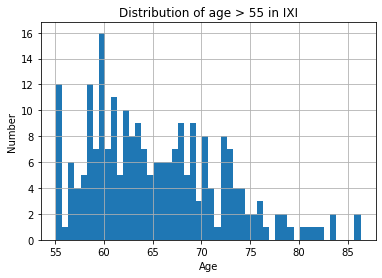

In [28]:
ixi["AGE"].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Number')
plt.title('Distribution of age > 55 in IXI')
plt.show()

<hr style="border:2px solid black"> </hr>

## 2. Data preprocessing

### 2.1 Total data (ADNI + IXI)

In [40]:
data = pd.concat([adni, ixi])
data.head()

,SID,lh.bankssts.thickness,lh.caudalanteriorcingulate.thickness,lh.caudalmiddlefrontal.thickness,lh.cuneus.thickness,lh.entorhinal.thickness,lh.fusiform.thickness,lh.inferiorparietal.thickness,lh.inferiortemporal.thickness,lh.isthmuscingulate.thickness,...,right.CA1,right.CA2.3,right.fimbria,right.subiculum,right.CA4.DG,right.hippocampal.fissure,AGE,GENDER,CLASS,SOURCE
0,002_S_0413,2.461,2.494,2.419,1.823,3.234,2.703,2.347,2.602,2.131,...,2245.06,6935.33,468.994,4874.58,4206.16,428.731,76.3,Female,1.0,ADNI
1,002_S_0559,2.364,2.289,2.180,1.610,3.354,2.626,2.282,2.757,2.451,...,3295.72,8485.99,312.787,5582.87,4757.17,465.081,79.3,Male,1.0,ADNI
2,002_S_0816,2.226,3.065,2.098,1.886,3.282,2.778,2.426,2.761,2.293,...,2577.06,7883.22,444.833,4079.73,4282.82,603.752,70.8,Male,3.0,ADNI
3,002_S_1018,2.400,2.553,2.341,1.969,3.023,2.631,2.187,2.754,2.536,...,2195.76,8405.02,578.550,3925.27,4562.00,424.563,70.7,Female,3.0,ADNI
4,002_S_1070,1.974,2.159,2.020,1.809,3.480,2.258,1.852,2.318,1.731,...,3237.34,10248.40,536.539,5627.43,5365.26,366.071,73.6,Male,2.0,ADNI


In [32]:
data.shape   # 739 rows × 363 columns

(739, 363)

In [38]:
data.describe()

,lh.bankssts.thickness,lh.caudalanteriorcingulate.thickness,lh.caudalmiddlefrontal.thickness,lh.cuneus.thickness,lh.entorhinal.thickness,lh.fusiform.thickness,lh.inferiorparietal.thickness,lh.inferiortemporal.thickness,lh.isthmuscingulate.thickness,lh.lateraloccipital.thickness,...,Right.Hippocampus.HS,right.presubiculum,right.CA1,right.CA2.3,right.fimbria,right.subiculum,right.CA4.DG,right.hippocampal.fissure,AGE,CLASS
count,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,...,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000
mean,2.297176,2.614731,2.356869,1.714871,3.145180,2.524135,2.237103,2.618848,2.266955,2.029066,...,2598.430379,3114.447456,2525.727889,7506.047415,382.752858,4503.381299,4146.475169,416.039003,70.640352,1.684709
std,0.212372,0.300442,0.168202,0.158905,0.482071,0.203079,0.179907,0.205774,0.223454,0.157445,...,519.875245,591.789678,411.938334,1261.952820,168.955302,811.300390,702.687009,189.084995,8.013226,0.780467
min,1.368000,1.770000,1.599000,1.155000,0.000000,1.712000,1.510000,1.938000,1.500000,1.412000,...,1181.930000,1213.090000,1351.650000,4219.450000,1.054900,1876.040000,1831.430000,47.941100,55.000000,1.000000
25%,2.183500,2.411500,2.258000,1.612000,2.869500,2.414000,2.141500,2.500000,2.128500,1.932000,...,2250.280000,2706.585000,2234.355000,6699.180000,264.534000,4019.905000,3706.460000,285.190500,64.500000,1.000000
50%,2.312000,2.598000,2.371000,1.711000,3.226000,2.537000,2.266000,2.624000,2.272000,2.033000,...,2601.320000,3146.810000,2535.540000,7577.460000,390.292000,4570.190000,4209.750000,390.344000,70.520000,1.000000
75%,2.448000,2.818500,2.473000,1.823500,3.468000,2.661000,2.354000,2.757500,2.412500,2.137500,...,2923.340000,3530.570000,2802.575000,8339.950000,495.507500,5050.660000,4618.865000,513.862500,76.150000,2.000000
max,2.846000,3.575000,2.807000,2.431000,4.185000,3.027000,2.689000,3.296000,2.984000,2.494000,...,4302.850000,4688.380000,4125.090000,11218.900000,856.910000,6691.600000,6137.390000,1561.330000,90.900000,3.000000


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 0 to 556
Columns: 363 entries, SID to SOURCE
dtypes: float64(212), int64(148), object(3)
memory usage: 2.1+ MB


In [33]:
data["GENDER"].value_counts()

Female    388
Male      351
Name: GENDER, dtype: int64

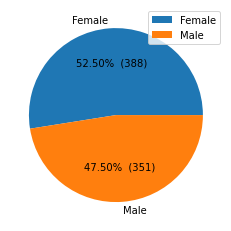

In [34]:
p4 = data["GENDER"].value_counts()
plt.pie(p4.values, labels=p4.index, autopct=make_autopct(p4.values))
plt.legend()
plt.show()

In [35]:
data["CLASS"].value_counts()  
# 1: CN (Cognitively normal)
# 2: MCI (Mild cognitive impairment)
# 3: Alzheimer

1.0    378
2.0    216
3.0    145
Name: CLASS, dtype: int64

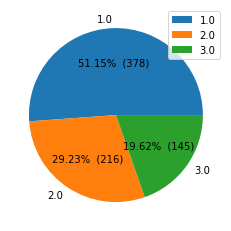

In [36]:
p5 = data["CLASS"].value_counts()  
plt.pie(p5.values, labels=p5.index, autopct=make_autopct(p5.values))
plt.legend()
plt.show()

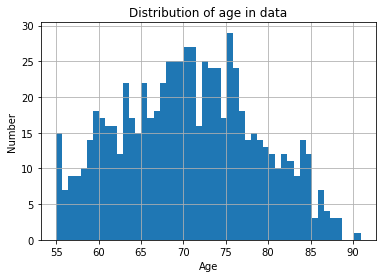

In [42]:
data["AGE"].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Number')
plt.title('Distribution of age in data')
plt.show()

<hr style="border:px solid black"> </hr>

### 2.3 Divide male and female data

In [44]:
# data_male    ## 351 rows × 363 columns
data_male = data.loc[data["GENDER"]=="Male"].copy()
data_male.reset_index(drop=True, inplace=True)                ## reset index

# data_female  ## 388 rows × 363 columns
data_female = data.loc[data["GENDER"]=="Female"].copy()
data_female.reset_index(drop=True, inplace=True)              ## reset index


---
- male data

In [28]:
data_male.shape

(351, 363)

In [29]:
data_male["CLASS"].value_counts() 

1.0    156
2.0    115
3.0     80
Name: CLASS, dtype: int64

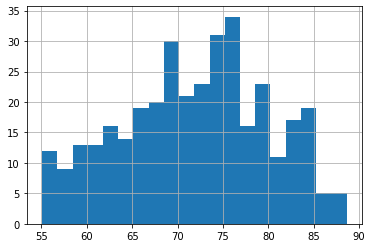

In [30]:
data_male["AGE"].hist(bins=20)
plt.show()

---
- female data

In [31]:
data_female.shape

(388, 363)

In [32]:
data_female["CLASS"].value_counts() 

1.0    222
2.0    101
3.0     65
Name: CLASS, dtype: int64

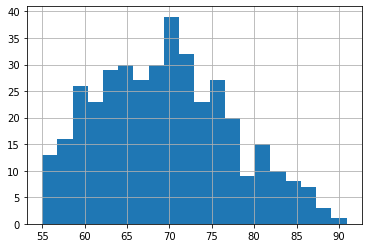

In [33]:
data_female["AGE"].hist(bins=20)
plt.show()



<hr style="border:px solid black"> </hr>

### 2.4 Stratified sampling

- __Male data:__

In [37]:
data_male.head()    # 351 rows × 363 columns

,SID,lh.bankssts.thickness,lh.caudalanteriorcingulate.thickness,lh.caudalmiddlefrontal.thickness,lh.cuneus.thickness,lh.entorhinal.thickness,lh.fusiform.thickness,lh.inferiorparietal.thickness,lh.inferiortemporal.thickness,lh.isthmuscingulate.thickness,...,right.CA1,right.CA2.3,right.fimbria,right.subiculum,right.CA4.DG,right.hippocampal.fissure,AGE,GENDER,CLASS,SOURCE
0,002_S_0559,2.364,2.289,2.180,1.610,3.354,2.626,2.282,2.757,2.451,...,3295.72,8485.99,312.787,5582.87,4757.17,465.081,79.3,Male,1.0,ADNI
1,002_S_0816,2.226,3.065,2.098,1.886,3.282,2.778,2.426,2.761,2.293,...,2577.06,7883.22,444.833,4079.73,4282.82,603.752,70.8,Male,3.0,ADNI
2,002_S_1070,1.974,2.159,2.020,1.809,3.480,2.258,1.852,2.318,1.731,...,3237.34,10248.40,536.539,5627.43,5365.26,366.071,73.6,Male,2.0,ADNI
3,002_S_1268,2.272,2.071,2.187,1.651,3.076,2.489,2.045,2.544,2.278,...,2515.28,7242.56,548.569,4306.83,4067.33,296.162,82.7,Male,2.0,ADNI
4,002_S_4171,1.973,2.653,2.287,1.853,3.119,2.361,2.051,2.186,1.969,...,2675.26,8377.59,626.024,4316.81,4560.59,583.231,69.4,Male,2.0,ADNI


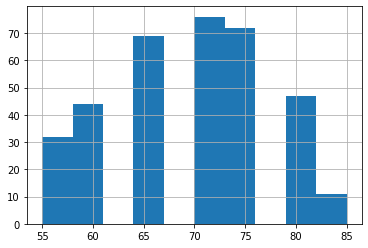

In [46]:
# ======================================================================================
# All male data
# Use all male data, perform stratified sampling, create training set and test set
# For multi-class classifiers
# ======================================================================================

# age category
data_male["age_cat"] = pd.cut(data_male["AGE"], 
                         bins=[0., 60., 65., 70., 75., 80., 85., np.inf], 
                         labels=[55, 60, 65, 70, 75, 80, 85])

# Histogram
data_male["age_cat"].hist()


# strat_male_train： 280 rows × 364 columns
# strat_male_test： 71 rows × 364 columns
strat_male_train, strat_male_test = train_test_split(data_male, test_size=0.2, 
                                                     stratify=data_male[["age_cat", "CLASS"]], 
                                                     random_state = 42)

# Prepare training set
# dataM_train:  280 rows × 359 columns
dataM_train = strat_male_train.drop(["age_cat","CLASS","SOURCE","GENDER","SID"], axis=1)
dataM_train_labels = strat_male_train["CLASS"].copy()

# Prepare testing set
# dataM_test:  71 rows × 359 columns
dataM_test = strat_male_test.drop(["age_cat","CLASS","SOURCE","GENDER","SID"], axis=1)
dataM_test_labels = strat_male_test["CLASS"].copy()

---
- Validation of stratified sampling

In [49]:
data_male["age_cat"].value_counts() / len(data_male)

70    0.216524
75    0.205128
65    0.196581
80    0.133903
60    0.125356
55    0.091168
85    0.031339
Name: age_cat, dtype: float64

In [47]:
strat_male_test["age_cat"].value_counts() / len(strat_male_test)

75    0.225352
70    0.211268
65    0.197183
80    0.126761
60    0.126761
55    0.098592
85    0.014085
Name: age_cat, dtype: float64

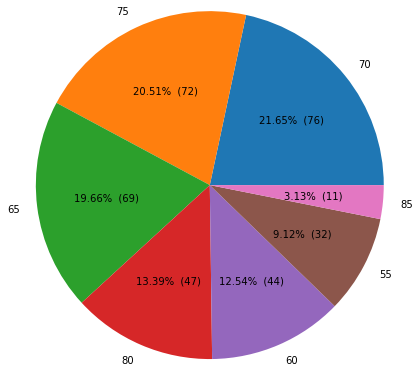

In [40]:
p7 = data_male["age_cat"].value_counts()  
plt.pie(p7.values, labels=p7.index, autopct=make_autopct(p7.values), radius=2)
plt.show()

In [50]:
data_male["CLASS"].value_counts() / len(data_male)

1.0    0.444444
2.0    0.327635
3.0    0.227920
Name: CLASS, dtype: float64

In [41]:
strat_male_test["CLASS"].value_counts() / len(strat_male_test)

1.0    0.450704
2.0    0.323944
3.0    0.225352
Name: CLASS, dtype: float64

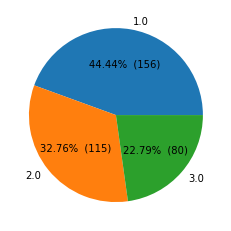

In [42]:
p8 = data_male["CLASS"].value_counts()  
plt.pie(p8.values, labels=p8.index, autopct=make_autopct(p8.values))
plt.show()

In [43]:
# ===================================
# For male binary classifier
# ===================================


# Class 1: CN (Cognitively normal)
# Class 2: MCI (Mild cognitive impairment)
# Class 3: AD (Alzheimer's disease)

male_CN = data_male.loc[data_male["CLASS"]==1.0].copy()
male_MCI = data_male.loc[data_male["CLASS"]==2.0].copy()
male_AD = data_male.loc[data_male["CLASS"]==3.0].copy()


In [44]:
# ===================
# CN vs. MCI 
# Male
# ===================


# male_CN_MCI (271 rows × 363 columns)
male_CN_MCI = pd.concat([male_CN, male_MCI])      

# age category
# male_CN_MCI (271 rows × 364 columns)
male_CN_MCI["age_cat"] = pd.cut(male_CN_MCI["AGE"],
                         bins=[0., 60., 65., 70., 75., 80., 85., np.inf],
                         labels=[55, 60, 65, 70, 75, 80, 85])

# split data
strat_male_CN_MCI_train, strat_male_CN_MCI_test = train_test_split(male_CN_MCI, test_size=0.2, 
                                                                   stratify=male_CN_MCI[["age_cat", "CLASS"]], 
                                                                   random_state = 42)

# Prepare training set
male_CN_MCI_train = strat_male_CN_MCI_train.drop(["age_cat","CLASS","SOURCE","GENDER","SID"], axis=1)
male_CN_MCI_train_labels = strat_male_CN_MCI_train["CLASS"].copy()

# Prepare testing set
male_CN_MCI_test = strat_male_CN_MCI_test.drop(["age_cat","CLASS","SOURCE","GENDER","SID"], axis=1)
male_CN_MCI_test_labels = strat_male_CN_MCI_test["CLASS"].copy()

In [45]:
# ===================
# CN vs. AD 
# Male
# ===================


# male_CN_AD ( 236 rows × 363 columns)
male_CN_AD = pd.concat([male_CN, male_AD])          

# age category
# male_CN_AD ( 236 rows × 364 columns)
male_CN_AD["age_cat"] = pd.cut(male_CN_AD["AGE"], 
                         bins=[0., 60., 65., 70., 75., 80., 85., np.inf], 
                         labels=[55, 60, 65, 70, 75, 80, 85])

# split data
strat_male_CN_AD_train, strat_male_CN_AD_test = train_test_split(male_CN_AD, test_size=0.2, 
                                                                   stratify=male_CN_AD[["age_cat", "CLASS"]], random_state = 42)

# Prepare training set
male_CN_AD_train = strat_male_CN_AD_train.drop(["age_cat","CLASS","SOURCE","GENDER","SID"], axis=1)
male_CN_AD_train_labels = strat_male_CN_AD_train["CLASS"].copy()

# Prepare testing set
male_CN_AD_test = strat_male_CN_AD_test.drop(["age_cat","CLASS","SOURCE","GENDER","SID"], axis=1)
male_CN_AD_test_labels = strat_male_CN_AD_test["CLASS"].copy()

In [46]:
# ===================
# MCI vs. AD 
# Male
# ===================


# male_MCI_AD ( 195 rows × 363 columns)
male_MCI_AD = pd.concat([male_MCI, male_AD])          

# age category
# male_MCI_AD ( 195 rows × 364 columns)
male_MCI_AD["age_cat"] = pd.cut(male_MCI_AD["AGE"], 
                         bins=[0., 60., 65., 70., 75., 80., 85., np.inf], 
                         labels=[55, 60, 65, 70, 75, 80, 85])

# split data
strat_male_MCI_AD_train, strat_male_MCI_AD_test = train_test_split(male_MCI_AD, test_size=0.2, 
                                                                   stratify=male_MCI_AD[["age_cat", "CLASS"]], random_state = 42)

# Prepare training set
male_MCI_AD_train = strat_male_MCI_AD_train.drop(["age_cat","CLASS","SOURCE","GENDER","SID"], axis=1)
male_MCI_AD_train_labels = strat_male_MCI_AD_train["CLASS"].copy()

# Prepare testing set
male_MCI_AD_test = strat_male_MCI_AD_test.drop(["age_cat","CLASS","SOURCE","GENDER","SID"], axis=1)
male_MCI_AD_test_labels = strat_male_MCI_AD_test["CLASS"].copy()

<hr style="border:2px solid black"> </hr>

- __Female data:__

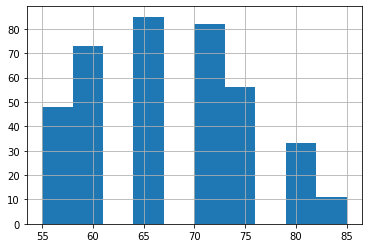

In [47]:
# ======================================================================================
# All female data
# Use all female data, perform stratified sampling, create training set and test set
# For multi-class classifiers
# ======================================================================================


# age category
data_female["age_cat"] = pd.cut(data_female["AGE"], 
                         bins=[0., 60., 65., 70., 75., 80., 85., np.inf], 
                         labels=[55, 60, 65, 70, 75, 80, 85])

# Histogram
data_female["age_cat"].hist()


# X_train, X_test, y_train, y_test = train_test_split(train_data, train_target, test_size, random_state，shuffle, ...)
# strat_female_train： 310 rows × 364 columns
# strat_female_test： 78 rows × 364 columns
strat_female_train, strat_female_test = train_test_split(data_female, test_size=0.2, 
                                                     stratify=data_female[["age_cat", "CLASS"]], random_state = 42)


# Prepare training set
# dataF_train:  310 rows × 359 columns
dataF_train = strat_female_train.drop(["age_cat","CLASS","SOURCE","GENDER","SID"], axis=1)
dataF_train_labels = strat_female_train["CLASS"].copy()

# Prepare testing set
# dataF_test:  78 rows × 359 columns
dataF_test = strat_female_test.drop(["age_cat","CLASS","SOURCE","GENDER","SID"], axis=1)
dataF_test_labels = strat_female_test["CLASS"].copy()


In [48]:
# ========================
# For binary classifier
# Female
# ========================

# Class 1: CN (Cognitively normal)
# Class 2: MCI (Mild cognitive impairment)
# Class 3: AD (Alzheimer's disease)

female_CN = data_female.loc[data_female["CLASS"]==1.0].copy()
female_MCI = data_female.loc[data_female["CLASS"]==2.0].copy()
female_AD = data_female.loc[data_female["CLASS"]==3.0].copy()


In [49]:
# ========================
# CN vs. MCI 
# Female
# ========================


# female_CN_MCI ( 323rows × 363 columns)
female_CN_MCI = pd.concat([female_CN, female_MCI])

# age category
female_CN_MCI["age_cat"] = pd.cut(female_CN_MCI["AGE"], 
                         bins=[0., 60., 65., 70., 75., 80., 85., np.inf], 
                         labels=[55, 60, 65, 70, 75, 80, 85])

# split data
strat_female_CN_MCI_train, strat_female_CN_MCI_test = train_test_split(female_CN_MCI, test_size=0.2, 
                                                                   stratify=female_CN_MCI[["age_cat", "CLASS"]], random_state = 42)

# Prepare training set
female_CN_MCI_train = strat_female_CN_MCI_train.drop(["age_cat","CLASS","SOURCE","GENDER","SID"], axis=1)
female_CN_MCI_train_labels = strat_female_CN_MCI_train["CLASS"].copy()

# Prepare testing set
female_CN_MCI_test = strat_female_CN_MCI_test.drop(["age_cat","CLASS","SOURCE","GENDER","SID"], axis=1)
female_CN_MCI_test_labels = strat_female_CN_MCI_test["CLASS"].copy()

In [50]:
# ========================
# CN vs. AD 
# Female
# ========================


# female_CN_AD ( 287 rows × 363 columns)
female_CN_AD = pd.concat([female_CN, female_AD])          

# age category
female_CN_AD["age_cat"] = pd.cut(female_CN_AD["AGE"], 
                         bins=[0., 60., 65., 70., 75., 80., 85., np.inf], 
                         labels=[55, 60, 65, 70, 75, 80, 85])

# split data
strat_female_CN_AD_train, strat_female_CN_AD_test = train_test_split(female_CN_AD, test_size=0.2, 
                                                                   stratify=female_CN_AD[["age_cat", "CLASS"]], random_state = 42)

# Prepare training set
female_CN_AD_train = strat_female_CN_AD_train.drop(["age_cat","CLASS","SOURCE","GENDER","SID"], axis=1)
female_CN_AD_train_labels = strat_female_CN_AD_train["CLASS"].copy()

# Prepare testing set
female_CN_AD_test = strat_female_CN_AD_test.drop(["age_cat","CLASS","SOURCE","GENDER","SID"], axis=1)
female_CN_AD_test_labels = strat_female_CN_AD_test["CLASS"].copy()

In [51]:
# ========================
# MCI vs. AD 
# Female
# ========================


# female_MCI_AD ( 166 rows × 363 columns)
female_MCI_AD = pd.concat([female_MCI, female_AD])          

# age category
female_MCI_AD["age_cat"] = pd.cut(female_MCI_AD["AGE"], 
                         bins=[0., 60., 65., 70., 75., 80., 85., np.inf], 
                         labels=[55, 60, 65, 70, 75, 80, 85])

# split data
strat_female_MCI_AD_train, strat_female_MCI_AD_test = train_test_split(female_MCI_AD, test_size=0.2, 
                                                                   stratify=female_MCI_AD[["age_cat", "CLASS"]], random_state = 42)

# Prepare training set
female_MCI_AD_train = strat_female_MCI_AD_train.drop(["age_cat","CLASS","SOURCE","GENDER","SID"], axis=1)
female_MCI_AD_train_labels = strat_female_MCI_AD_train["CLASS"].copy()

# Prepare testing set
female_MCI_AD_test = strat_female_MCI_AD_test.drop(["age_cat","CLASS","SOURCE","GENDER","SID"], axis=1)
female_MCI_AD_test_labels = strat_female_MCI_AD_test["CLASS"].copy()

<hr style="border:2px solid black"> </hr>

## 3. Correlation

In [63]:
# Pearson correlation coefficient (for linear correlation)

corr_matrix = data_male.corr()

corr_matrix["CLASS"].sort_values(ascending=False) 

CLASS                                       1.000000
Left.Inf.Lat.Vent                           0.534943
Right.Inf.Lat.Vent                          0.521061
Right.choroid.plexus                        0.442088
Left.Lateral.Ventricle                      0.400417
Right.Lateral.Ventricle                     0.354109
rh.caudalanteriorcingulate.thicknessstd     0.326080
rh.rostralanteriorcingulate.thicknessstd    0.323238
X3rd.Ventricle                              0.320516
AGE                                         0.310638
Left.choroid.plexus                         0.308743
lh.caudalanteriorcingulate.thicknessstd     0.308543
Optic.Chiasm                                0.292496
Left.vessel                                 0.289172
WM.hypointensities                          0.289075
CSF                                         0.288978
non.WM.hypointensities                      0.263721
lh.rostralanteriorcingulate.thicknessstd    0.252316
rh.pericalcarine.thickness                  0.

In [64]:
# ==========================
# Save a Notebook session
# ==========================


dill.dump_session('Data_structure_and_processing.db')

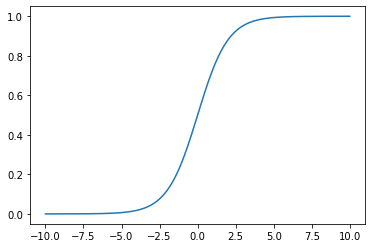

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(t):
    return 1 / (1 + np.exp(-t))

x = np.linspace(-10, 10, 500)
y = sigmoid(x)
plt.plot(x, y)
plt.show()
